# Exploratory Data Analysis and preprocessing on datasets

**EDA:**

look at datasets

find outliers
 
**Preprocessing:**

remove unnecessary columns

handle missing values and bad entries

Create matching id for both table

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### cars for sale data (cars_raw.csv)

In [3]:
# data
df_raw = pd.read_csv('./data/cars_raw.csv')
df_raw.head(5)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [4]:
df_raw.sample(3)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
6751,2019,Mercedes-Benz,C-Class C 300,Mercedes-Benz Certified,"$33,998",4.8,40,Dealer,W.I. Simonson Inc.,4.5,...,Black,Rear-wheel Drive,23,34,Gasoline,9-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,55SWF8DB2KU313816,SKU313816,17335
1781,2015,Porsche,Cayenne S,Used,"$39,983",4.9,13,Dealer,Eastside Motoring,5.0,...,Black,All-wheel Drive,17,24,Gasoline,8-Speed Automatic,3.6L V6 24V GDI DOHC Twin Turbo,WP1AB2A2XFLA57158,A57158,59786
4912,2018,Mazda,CX-9 Touring,Used,"$31,998",4.8,67,Dealer,CarMax Lynnwood - Now offering Curbside Pickup,1.5,...,Sand,All-wheel Drive,20,26,Gasoline,6-Speed Automatic,2.5L V6 24V,JM3TCBCY1J0201657,22617563,38060


In [5]:
df_raw.shape

(9379, 32)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [7]:
df_raw.describe()

,Year,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2018.721719,4.702825,133.187014,4.412571,984.089988,4.771895,4.727391,4.696290,4.537083,4.782194,4.681746,22.755411,29.216548,37463.023350
std,2.221708,0.240795,154.985640,0.626258,1609.039864,0.217822,0.194391,0.253664,0.338098,0.171537,0.368161,14.812869,12.809783,24970.342569
min,2001.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18666.500000
50%,2019.000000,4.800000,75.000000,4.600000,542.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32907.000000
75%,2020.000000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47698.000000
max,2022.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


In [8]:
df_raw['Used/New'].value_counts()

Used/New
Used                       7900
BMW Certified               247
Mercedes-Benz Certified     223
Honda Certified             208
Toyota Certified            153
Cadillac Certified          105
Ford Certified               71
Subaru Certified             58
Jeep Certified               55
Nissan Certified             50
Acura Certified              47
Chevrolet Certified          40
Kia Certified                34
INFINITI Certified           34
Volvo Certified              33
Porsche Certified            25
RAM Certified                24
Buick Certified              20
Volkswagen Certified         17
GMC Certified                13
Dodge Certified              10
Alfa Romeo Certified          7
Bentley Certified             2
MINI Certified                1
Ferrari Certified             1
Maserati Certified            1
Name: count, dtype: int64

In [9]:
# count how many are NOT "Used"
new_count = df_raw[df_raw["Used/New"] != "Used"].shape[0]
used_count = df_raw[df_raw["Used/New"] == "Used"].shape[0]
print("Used:", used_count)
print("New:", new_count)

Used: 7900
New: 1479


In [10]:
# check for NaN
df_raw.isna().any().any()

np.True_

In [11]:
df_raw.isna().sum()

Year                       0
Make                       0
Model                      0
Used/New                   0
Price                      0
ConsumerRating             0
ConsumerReviews            0
SellerType                 0
SellerName                 0
SellerRating               0
SellerReviews              0
StreetName                 0
State                      0
Zipcode                    0
DealType                 222
ComfortRating              0
InteriorDesignRating       0
PerformanceRating          0
ValueForMoneyRating        0
ExteriorStylingRating      0
ReliabilityRating          0
ExteriorColor              0
InteriorColor              0
Drivetrain                 0
MinMPG                     0
MaxMPG                     0
FuelType                   0
Transmission               0
Engine                     0
VIN                        0
Stock#                     0
Mileage                    0
dtype: int64

#### Cars Data Visualization

Text(0.5, 1.0, 'Correlation Matrix (Lower value = stronger correlation)')

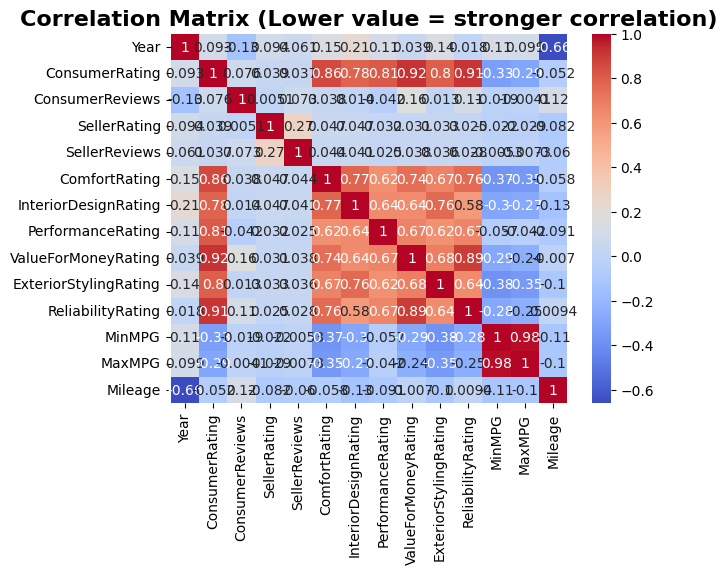

In [12]:
sns.heatmap(df_raw.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Lower value = stronger correlation)", fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Reliability Ratings Distribution')

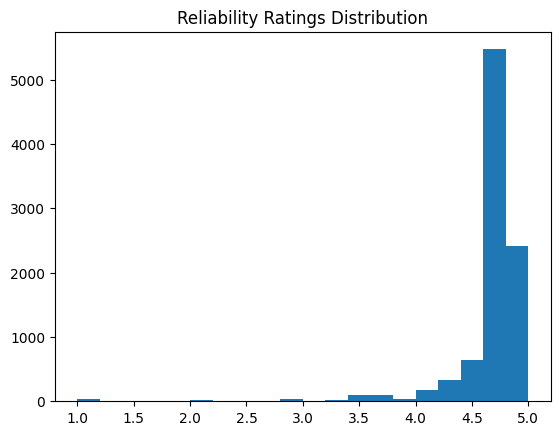

In [13]:
# heat map of Reliability ratings
plt.hist(df_raw['ReliabilityRating'], bins=20)
plt.title('Reliability Ratings Distribution')

In [14]:
# Reliability ratings under 2
df_raw[df_raw['ReliabilityRating'] < 2].shape

(28, 32)

Text(0.5, 1.0, 'Comfort Ratings Distribution')

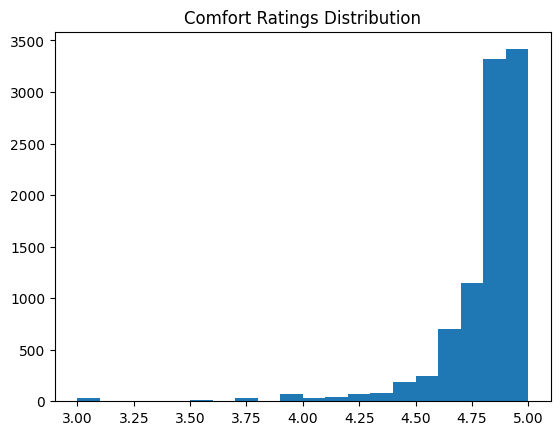

In [15]:
# heat map of Comfort ratings
plt.hist(df_raw['ComfortRating'], bins=20)
plt.title('Comfort Ratings Distribution')

<Axes: xlabel='Make'>

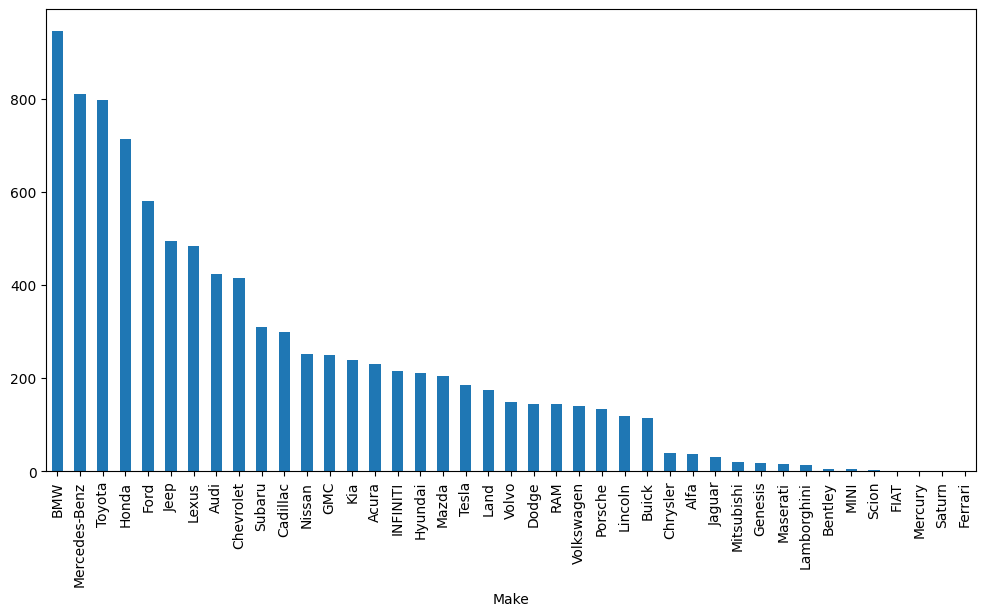

In [16]:
# Heatmap for car make
plt.figure(figsize=(12, 6))
df_raw['Make'].value_counts().plot(kind='bar')

### EDA: Car ratings data (Review.csv)

In [17]:
df_ratings_raw = pd.read_csv("./data/review.csv")
df_ratings_raw.head(3)

,Company,Model,Year,Reviewer,Date,Unnamed: 5,Rating,Unnamed: 7
0,acura,ilx,2013,mahowald,08/12/2012,NaN,5,NaN
1,acura,ilx,2013,VIP,07/26/2016,NaN,5,NaN
2,acura,ilx,2013,bybchucky,09/14/2013,NaN,4,NaN


In [18]:
# remove ghost columns
df_ratings_raw = df_ratings_raw.drop(columns=["Unnamed: 5", "Unnamed: 7"])
df_ratings_raw.head(2)

,Company,Model,Year,Reviewer,Date,Rating
0,acura,ilx,2013,mahowald,08/12/2012,5
1,acura,ilx,2013,VIP,07/26/2016,5


In [19]:
df_ratings_raw.shape

(299045, 6)

In [20]:
df_ratings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299045 entries, 0 to 299044
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Company   299045 non-null  object
 1   Model     299045 non-null  object
 2   Year      299045 non-null  int64 
 3   Reviewer  298938 non-null  object
 4   Date      299028 non-null  object
 5   Rating    299045 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 13.7+ MB


In [21]:
df_ratings_raw["Rating"].describe()

count    299045.000000
mean          3.980886
std           0.993001
min           0.000000
25%           4.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [22]:
# check for NaN
df_ratings_raw.isna().any().any()

np.True_

In [23]:
df_ratings_raw.isna().sum()

Company       0
Model         0
Year          0
Reviewer    107
Date         17
Rating        0
dtype: int64

In [24]:
df_ratings_raw[df_ratings_raw.isna().any(axis=1)]


,Company,Model,Year,Reviewer,Date,Rating
3200,acura,rlx,2016,NaN,12/28/2018,3
5605,acura,tl,2002,NaN,12/07/2002,4
9318,audi,a4,2002,NaN,05/08/2002,4
9321,audi,a4,2002,NaN,05/08/2002,5
10224,audi,a4,2007,NaN,09/06/2007,4
...,...,...,...,...,...,...
290880,volkswagen,new-beetle,2001,NaN,01/15/2003,4
291089,volkswagen,new-beetle,2003,NaN,08/14/2002,4
291780,volkswagen,phaeton,2004,NaN,12/11/2003,4
295142,volvo,xc90,2003,NaN,01/16/2003,5


#### Car ratings data Visualizations

Text(0.5, 1.0, 'Ratings Distribution')

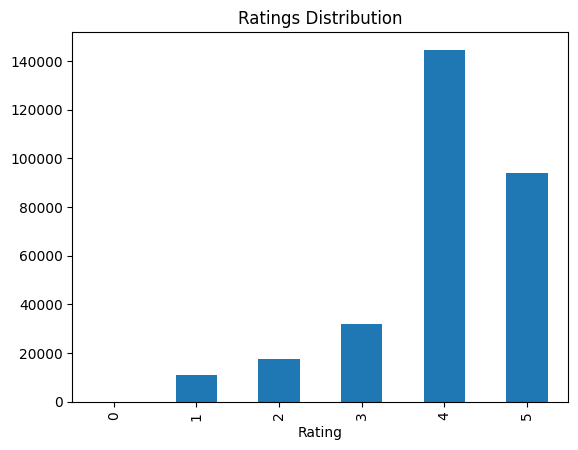

In [25]:
# ratings barchart
df_ratings_raw['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Ratings Distribution')

## Preprocessing datasets

### Cars for sale data

In [26]:
df_cars = df_raw.copy()

In [27]:
# remove unwanted columns
df_cars = df_cars.drop(columns=["ConsumerRating", "ConsumerReviews", "SellerName", "SellerRating", "SellerReviews", "InteriorColor", "Zipcode", "State", "DealType", "StreetName", "Stock#", "VIN", "Engine"])

In [28]:
# Simplify "Used/New" column to just "Used" and "New"
df_cars["Used/New"] = df_cars["Used/New"].apply(
    lambda x: "Used" if x == "Used" else "New"
)
df_cars['Used/New'].value_counts()

Used/New
Used    7900
New     1479
Name: count, dtype: int64

In [29]:
# PRICE COLUMN: Remove $ and commas, then convert to float
df_cars['Price'] = (
    df_cars['Price']
    .replace('[\$,]', '', regex=True)  # remove $ and ,
    .replace('Not Priced', None)  # replace 'Not Priced' with None
)
# Convert to float
df_cars['Price'] = pd.to_numeric(df_cars['Price'], errors='coerce')

print(df_cars['Price'].dtype)
df_cars['Price'].head(3)

float64


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Nikla_000\AppData\Local\Temp\ipykernel_9656\209616860.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)  # remove $ and ,


0    39998.0
1    49985.0
2    41860.0
Name: Price, dtype: float64

In [30]:
# TRANSMISSION COLUMN: Simplify to just "Automatic" and "Manual"
df_cars['Transmission'] = df_cars['Transmission'].apply(
    lambda x: 'Automatic' if 'auto' in str(x).lower() else 'Manual'
)
# check unique values
df_cars['Transmission'].value_counts()

Transmission
Automatic    9174
Manual        205
Name: count, dtype: int64

In [31]:
# ensure consistent naming in "Make" and "Model" columns
df_cars['Make'] = df_cars['Make'].str.strip().str.lower()
df_cars['Model'] = df_cars['Model'].str.strip().str.lower()

In [32]:
# create carkey for each Make-Model-Year combination
df_cars['car_key'] = df_cars['Make'] + "_" + df_cars['Model'] + "_" + df_cars['Year'].astype(str)

In [33]:
# remove duplicates based on car_key
df_cars = df_cars.drop_duplicates(subset=['car_key']).reset_index(drop=True)
df_cars.shape

(2469, 20)

In [34]:
# create carid for each unique car in df_cars
df_cars['carid'] = df_cars.index + 1

### Preprocess: Car ratings data

In [35]:
df_ratings = df_ratings_raw.copy()

In [36]:
# rename column for consistency
df_ratings.rename(columns={"Company": "Make"}, inplace=True)

In [37]:
# drop rows with NaN in "Date" or "Reviewer"
df_ratings = df_ratings.dropna(subset=["Date", "Reviewer"])
df_ratings.isna().any().any()

np.False_

In [38]:
# create unique userID for each Reviewer
df_ratings['userID'] = df_ratings['Reviewer'].astype('category').cat.codes + 1

In [39]:
# ensure consistent naming in "Make" and "Model" columns
df_ratings['Make'] = df_ratings['Make'].str.strip().str.lower()
df_ratings['Model'] = df_ratings['Model'].str.strip().str.lower()

### Tables working together

In [40]:
import re

def clean_model(model):
    """Remove common trim-levels from car model names."""
    # Remove common trim-levels (case insensitive)
    return re.sub(r'\b(se|le|xle|lx|ex|sport|limited|platinum|plus|4MATIC|R/T|xl|sl|sr|base)\b', '', str(model).lower()).strip()

In [41]:
# clean model names in both dataframes
df_cars['Model'] = df_cars['Model'].apply(clean_model)
df_ratings['Model'] = df_ratings['Model'].apply(clean_model)
df_ratings

,Make,Model,Year,Reviewer,Date,Rating,userID
0,acura,ilx,2013,mahowald,08/12/2012,5,174180
1,acura,ilx,2013,VIP,07/26/2016,5,118905
2,acura,ilx,2013,bybchucky,09/14/2013,4,134910
3,acura,ilx,2013,bayareamom,01/26/2015,4,129574
4,acura,ilx,2013,Kerry Olson,03/26/2016,5,65542
...,...,...,...,...,...,...,...
299040,volvo,xc70,2016,FirstVolvo,03/18/2017,5,39155
299041,volvo,xc70,2016,Dhp,01/26/2016,5,31382
299042,volvo,xc70,2016,Lisa B,05/03/2016,5,70799
299043,volvo,xc70,2016,Milan,05/04/2019,5,80618


In [42]:
# recreate carkey for each Make-Model-Year combination (same as for df_cars) for both datasets
df_ratings['car_key'] = df_ratings['Make'] + "_" + df_ratings['Model'] + "_" + df_ratings['Year'].astype(str)
df_cars['car_key'] = df_cars['Make'] + "_" + df_cars['Model'] + "_" + df_cars['Year'].astype(str)

In [43]:
# merge to get carid in df_ratings
df_ratings = df_ratings.merge(df_cars[['car_key', 'carid']], on='car_key', how='inner')
df_ratings.shape

(24756, 9)

In [44]:
overlap = df_ratings['carid'].isin(df_cars['carid']).sum()
print(f"{overlap} ratings have a matching car in cars_df")

24756 ratings have a matching car in cars_df


In [45]:
df_ratings.shape

(24756, 9)

In [46]:
df_ratings['userID'].value_counts().describe()

count    13982.000000
mean         1.770562
std          3.131731
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        122.000000
Name: count, dtype: float64

In [62]:
# combine string features into one column
df_cars['Features'] = (
    df_cars['Year'].astype(str) + ' ' +    
    df_cars['Make'] + ' ' +
    df_cars['Model'] + ' ' +
    df_cars['Drivetrain'] + ' ' +
    df_cars['FuelType'] + ' ' +
    df_cars['Transmission'] + ' ' +
    df_cars['ExteriorColor']
)

## FINAL DATASETS

export

**cars.csv** and **car_ratings.csv**

In [63]:
df_cars.head(3)

,Year,Make,Model,Used/New,Price,SellerType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,...,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Mileage,car_key,carid,features,Features
0,2019,toyota,sienna,Used,39998.0,Dealer,4.7,4.6,4.6,4.4,...,Front-wheel Drive,19,27,Gasoline,Automatic,29403,toyota_sienna_2019,1,2019 toyota sienna Front-wheel Drive Gasoline ...,2019 toyota sienna Front-wheel Drive Gasoline ...
1,2018,ford,f-150 lariat,Used,49985.0,Dealer,4.9,4.8,4.8,4.6,...,Four-wheel Drive,19,24,Gasoline,Automatic,32929,ford_f-150 lariat_2018,2,2018 ford f-150 lariat Four-wheel Drive Gasoli...,2018 ford f-150 lariat Four-wheel Drive Gasoli...
2,2017,ram,1500 laramie,Used,41860.0,Dealer,4.8,4.7,4.8,4.6,...,Four-wheel Drive,15,21,Gasoline,Automatic,23173,ram_1500 laramie_2017,3,2017 ram 1500 laramie Four-wheel Drive Gasolin...,2017 ram 1500 laramie Four-wheel Drive Gasolin...


In [49]:
# remove unwanted columns
df_ratings_clean = df_ratings[['userID', 'carid', 'Rating', 'Date']].copy()
df_ratings_clean.head(3)

,userID,carid,Rating,Date
0,98305,1999,5,05/14/2020
1,104494,1999,5,07/04/2020
2,32756,1999,5,08/07/2020


In [66]:
# repeat for df_cars
df_cars_clean = df_cars[['carid','Features', 'Price']].copy()
df_cars_clean.head(3)

,carid,Features,Price
0,1,2019 toyota sienna Front-wheel Drive Gasoline ...,39998.0
1,2,2018 ford f-150 lariat Four-wheel Drive Gasoli...,49985.0
2,3,2017 ram 1500 laramie Four-wheel Drive Gasolin...,41860.0


In [67]:
print(df_ratings_clean.columns)
print(df_cars_clean.columns)

Index(['userID', 'carid', 'Rating', 'Date'], dtype='object')
Index(['carid', 'Features', 'Price'], dtype='object')


In [68]:
# export cleaned dataframes as new CSV files
df_cars_clean.to_csv("./data/df_cars_clean.csv", index=False)
df_ratings_clean.to_csv("./data/df_ratings_clean.csv", index=False)

## Bonus plot to get depressed

Text(0.5, 1.0, 'Average Price by Year')

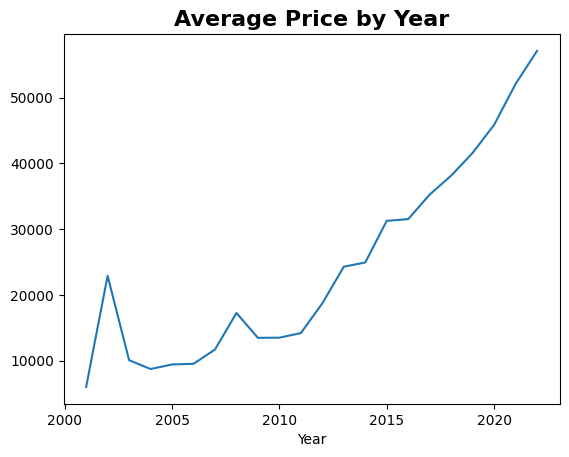

In [53]:
df_cars_clean.groupby('Year')['Price'].mean().plot(kind='line')
plt.title('Average Price by Year', fontsize=16, fontweight='bold')